# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [4]:
apple=data

### Step 4.  Check out the type of the columns

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [18]:
apple['Date']=pd.to_datetime(apple['Date'])

In [37]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [13]:
apple.index=apple['Date']

In [14]:
# 데이터 확인해보기
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [39]:
apple['Date'].duplicated().any()
#있으면 True 없으면 False로 출력되도록 만들어줌.

False

There is no duplicated dates in dataframe

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [42]:
apple_date_sorted= apple.sort_index(ascending=True)
apple_date_sorted

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [48]:
last_business_days=apple.resample('BM').last()
print(last_business_days)

                 Date    Open    High     Low   Close     Volume  Adj Close
Date                                                                       
1980-12-31 1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53
1981-01-30 1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44
1981-02-27 1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41
1981-03-31 1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
1981-04-30 1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
...               ...     ...     ...     ...     ...        ...        ...
2014-03-31 2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
2014-04-30 2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
2014-05-30 2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43
2014-06-30 2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93
2014-07-31 2014-07-08   96.27   96.80   93.92   95.35   65130000      95.35

[404 rows x

C:\Users\USER\AppData\Local\Temp\ipykernel_16324\73682030.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  last_business_days=apple.resample('BM').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [43]:
diff=apple.index.max()-apple.index.min()
diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [49]:
n_months=apple.resample('M').size().shape[0]
n_months

C:\Users\USER\AppData\Local\Temp\ipykernel_16324\2423967853.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  n_months=apple.resample('M').size().shape[0]


404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0.5, 1.0, 'Plot of Adj Close value')

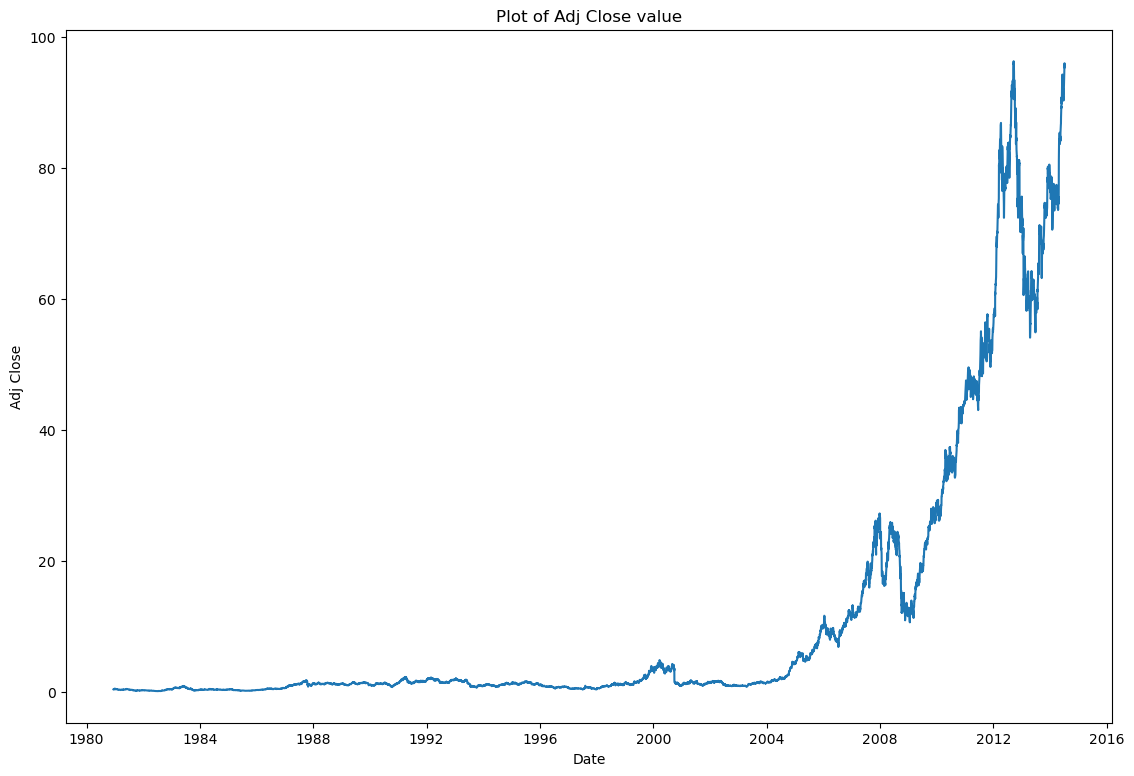

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5,9))
plt.plot(apple['Date'], apple['Adj Close'])
plt.xlabel("Date")
plt.ylabel('Adj Close')
plt.title('Plot of Adj Close value')